# Clustering : K-Means : Uber Pickups

This is data of Uber pickups in New York City.  
The data is from this [kaggle competition](https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city).

Sample data looks like this
```
"Date_Time","Lat","Lon","Base"
"4/1/2014 0:11:00",40.769,-73.9549,"B02512"
"4/1/2014 0:17:00",40.7267,-74.0345,"B02512"
"4/1/2014 0:21:00",40.7316,-73.9873,"B02512"
"4/1/2014 0:28:00",40.7588,-73.9776,"B02512"
```

In [0]:
%matplotlib inline

import time
from matplotlib import pyplot
from sklearn.cluster import KMeans
import pandas as pd

## Step 1: Load the Data
We will also specify schema to reduce loading time

In [0]:
# file to read

## sample file with 10,000 records
data_file="https://s3.amazonaws.com/elephantscale-public/data/uber-nyc/uber-sample-10k.csv"

## larger file with about 500k records
# data_file = "https://s3.amazonaws.com/elephantscale-public/data/uber-nyc/uber-raw-data-apr14.csv.gz"


### Specify Schema

### Read Data

In [3]:
uber_pickups = pd.read_csv(data_file)

records_count_total = len(uber_pickups)
uber_pickups.head()

Date_Time      Lat      Lon    Base
0  9/25/2014 15:28:00  40.7633 -73.9402  B02598
1    9/5/2014 3:50:00  40.7441 -74.0067  B02617
2  9/24/2014 13:39:00  40.7408 -73.9916  B02617
3   9/18/2014 0:31:00  40.7396 -74.0023  B02617
4  9/20/2014 11:22:00  40.7441 -73.9919  B02617

## Step 2: Cleanup data
make sure our data is clean

In [4]:
uber_pickups_clean = uber_pickups.dropna(subset=['Lat', 'Lon'])
records_count_clean = len(uber_pickups_clean)

print ("cleaned records {:,},  dropped {:,}".format(records_count_clean,  (records_count_total - records_count_clean)))

cleaned records 9,999,  dropped 0


## Step 3 : Create Feature Vectors

In [5]:
## TODO : create a feature vectors using 'Lat'  and 'Lon'  attributes
featureVector = uber_pickups_clean[['Lat', 'Lon']]
featureVector.head()

Lat      Lon
0  40.7633 -73.9402
1  40.7441 -74.0067
2  40.7408 -73.9916
3  40.7396 -74.0023
4  40.7441 -73.9919

In [6]:
## TODO : start with 4 clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, n_init=1)

t1 = time.perf_counter()
## TODO : fit (featureVector)
model = kmeans.fit(featureVector)
t2 = time.perf_counter()

wssse = model.inertia_


print("Kmeans : {} clusters computed in {:,.2f} ms".format( num_clusters,  ((t2-t1)*1000)))
print ("num_clusters = {},  WSSSE = {:,}".format(num_clusters, wssse))

Kmeans : 4 clusters computed in 48.59 ms
num_clusters = 4,  WSSSE = 19.462227199304458


## Step 5: Let's find the best K - Hyperparameter tuning

Let's try iterating and plotting over values of k, so we can practice using the elbow method.


In [7]:
kvals = []
wssses = []

## TODO : loop over k values from 2 to 10
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=1)
    t1 = time.perf_counter()
    model = kmeans.fit(featureVector)
    t2 = time.perf_counter()
    wssse = model.inertia_
    print ("k={},  wssse={},  time took {:,.2f} ms".format(k,wssse, ((t2-t1)*1000)))
    kvals.append(k)
    wssses.append(wssse)

k=2,  wssse=29.988611935455385,  time took 15.49 ms
k=3,  wssse=23.26830570354639,  time took 21.41 ms
k=4,  wssse=19.22412523870832,  time took 26.80 ms
k=5,  wssse=16.434000011571808,  time took 17.29 ms
k=6,  wssse=14.097735794903855,  time took 18.63 ms
k=7,  wssse=11.145125107248408,  time took 27.15 ms
k=8,  wssse=8.365423996766312,  time took 27.22 ms
k=9,  wssse=7.297331753532788,  time took 40.92 ms


In [8]:
import pandas as pd
df = pd.DataFrame({'k': kvals, 'wssse':wssses})
df.head()

k      wssse
0  2  29.988612
1  3  23.268306
2  4  19.224125
3  5  16.434000
4  6  14.097736

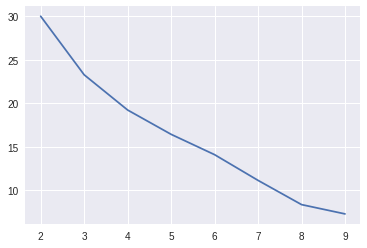

In [9]:
pyplot.plot(kvals, wssses)

## Step 6 : Let's run K-Means with the best K we have choosen
From the graph above, choose a good K value.  We wwill use that below

In [10]:
## TODO : pick a K value
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, n_init=1)

t1 = time.perf_counter()
model = kmeans.fit(featureVector)
t2 = time.perf_counter()

wssse = model.inertia_


print("Kmeans : {} clusters computed in {:,.2f} ms".format( num_clusters,  ((t2-t1)*1000)))
print ("num_clusters = {},  WSSSE = {:,}".format(num_clusters, wssse))

Kmeans : 6 clusters computed in 36.67 ms
num_clusters = 6,  WSSSE = 12.51197380664517


### Predict

In [11]:
t1 = time.perf_counter()
predicted = uber_pickups_clean
predicted['prediction'] = model.predict(featureVector)
t2 = time.perf_counter()

print ("{:,} records clustered in {:,.2f} ms".format(len(predicted), ((t2-t1)*1000) ))

predicted.head()

9,999 records clustered in 5.17 ms


Date_Time      Lat      Lon    Base  prediction
0  9/25/2014 15:28:00  40.7633 -73.9402  B02598           1
1    9/5/2014 3:50:00  40.7441 -74.0067  B02617           0
2  9/24/2014 13:39:00  40.7408 -73.9916  B02617           0
3   9/18/2014 0:31:00  40.7396 -74.0023  B02617           0
4  9/20/2014 11:22:00  40.7441 -73.9919  B02617           0

## Step 7 : Print Cluster Center and Size

In [12]:
cluster_count = predicted.groupby("prediction").size()
cluster_count


prediction
0    6356
1    1787
2     361
3      90
4    1361
5      44
dtype: int64

## Step 8 : Ploting time!
We are going to plot the results now.  
Since we are dealing with GEO co-ordinates, let's use Google Maps!  

Go to the following URL :  
[https://jsfiddle.net/sujee/omypetfu/](https://jsfiddle.net/sujee/omypetfu/)

- Run the code cell below
- copy paste the output into Javascript section of the JSFiddle Editor (lower left)
- and click 'Run'  (top nav bar)
- Click on 'tidy' (top nav bar)  to cleanup code

See the following image 

<img src="../assets/images/kmeans_uber_trips_map.png" style="border: 5px solid grey ; max-width:100%;" />

You will be rewarded with a beautiful map of clusters on Google Maps

<img src="../assets/images/Kmeans_uber_trips.png" style="border: 5px solid grey ; max-width:100%;" />

Optional
- You can 'fork' the snippet and keep tweaking

In [13]:
### generate Javascript
s1 = "var clusters = {"

s2 = ""

prediction_count = predicted.groupby("prediction").size()
total_count = 0
cluster_centers = model.cluster_centers_
for i in range(0, num_clusters):
    count = prediction_count[i]
    lat = cluster_centers[i][0]
    lng = cluster_centers[i][1]
    total_count = total_count + count
    if (i > 0):
        s2 = s2 + ","
    s2 = s2 + " {}: {{ center: {{ lat: {}, lng: {} }}, count: {} }}".\
        format(i, lat, lng, count)
    #s2 = s2 + "{}: {{  center: {{ }}, }}".format(i)

s3 = s1 + s2 + "};"

s4 = 
function initMap() {
  // Create the map.
  var map = new google.maps.Map(document.getElementById('map'), {
    zoom: 10,
    center: {
      lat: 40.77274573,
      lng: -73.94
    },
    mapTypeId: 'roadmap'
  });

  // Construct the circle for each value in citymap.
  // Note: We scale the area of the circle based on the population.
  for (var cluster in clusters) {
    // Add the circle for this city to the map.
    var cityCircle = new google.maps.Circle({
      strokeColor: '#FF0000',
      strokeOpacity: 0.8,
      strokeWeight: 2,
      fillColor: '#FF0000',
      fillOpacity: 0.35,
      map: map,
      center: clusters[cluster].center,


s5 = "radius: clusters[cluster].count / {} * 100 * 300 }});  }}}}".format(total_count)

# final
s = s3 + s4 + s5

print(s)

SyntaxError: ignored

## Step 9: Let's analyze some more data

- In Step-1 select the data_file to 
```
data_file = "/data/uber-nyc/uber-raw-data-apr14.csv.gz"
```
- And select 'Cell --> Run All'  to execute all code blocks


## Step 10 : Running the script

**Use the download script**

```bash
cd   ~/data/uber-nyc
./download-data.sh
```

This will download more data.

As we run on larger dataset, the execution will take longer and Jupyter notebook might time out.  So let's run this in command line / script mode

```bash

$    cd   ~/ml-labs-python/clustering

$    time  python  kmeans-uber.py 2> logs

```

Watch the output
